# Handwritten Digits Recognition Using CNN 

In [2]:
import numpy as np
from keras.datasets import mnist

#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

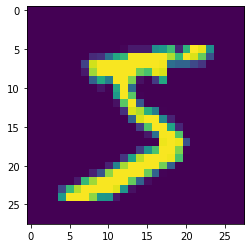

In [3]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

In [5]:

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [6]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [8]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 170s 90ms/step - loss: 0.9992 - accuracy: 0.9062 - val_loss: 0.1348 - val_accuracy: 0.9628
Epoch 2/3
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0748 - accuracy: 0.9759 - val_loss: 0.0874 - val_accuracy: 0.9751
Epoch 3/3
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0842 - val_accuracy: 0.9768


In [10]:
model.save('model.h5')

In [11]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[2.1169733e-10, 5.2978311e-15, 4.3254778e-09, 1.9039200e-08,
        7.9355041e-14, 1.6334856e-13, 8.7805436e-16, 1.0000000e+00,
        3.0047282e-08, 1.9677047e-09],
       [1.0875300e-07, 2.8667348e-06, 9.9998546e-01, 1.4536704e-06,
        7.0836101e-11, 8.4350745e-13, 3.2649839e-06, 4.3882915e-11,
        6.8952345e-06, 2.0847920e-12],
       [1.7230984e-07, 9.9945098e-01, 1.7240527e-04, 3.3588332e-08,
        3.8123958e-06, 4.6451794e-07, 5.9178437e-06, 1.4214642e-06,
        3.6434588e-04, 4.1697254e-07],
       [9.9987626e-01, 8.2559107e-12, 5.4440634e-06, 1.6433925e-09,
        1.7668969e-09, 9.4451963e-08, 4.4907597e-06, 1.5388876e-10,
        6.6283508e-07, 1.1301656e-04]], dtype=float32)

In [12]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.models import load_model
model = load_model("model.h5")
 
score = model.evaluate(X_test, y_test)
 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100)

313/313 [==============================] - 6s 20ms/step - loss: 0.0842 - accuracy: 0.9768
Test loss: 0.08417844027280807
Test accuracy: 97.680002450943
